In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./DATA/preprocessing_1999_2022.csv")

In [3]:
data.head(5)

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases,15-19,High School Incomplete,500 - 999,672 - 8736,14,1927,7.39,1999
1,Certain infectious and parasitic diseases,15-19,High School Incomplete,2500 - 2999,672 - 8736,11,55119,0.20,1999
2,Certain infectious and parasitic diseases,15-19,High School Incomplete,3000 - 3499,672 - 8736,10,99462,0.10,1999
3,Certain infectious and parasitic diseases,20-24,High School Incomplete,500 - 999,672 - 8736,15,1179,12.90,1999
4,Certain infectious and parasitic diseases,20-24,High School Graduate,500 - 999,672 - 8736,17,2490,6.93,1999


### **Câu hỏi 1: Trình độ học vấn của mẹ có mối quan hệ như nào trong việc sinh và tử vong của trẻ?**


- Lợi ích của việc trả lời câu hỏi này: nắm được bậc học sẽ quan trọng như nào trong việc trẻ phát triển 
- Trả lời câu hỏi này bằng cách: 
    + Tìm số ca sinh của từng trình độ học vấn
    + Tìm tổng số ca tử của từng  trình độ học vấn.
    + Vẽ biểu đồ so sánh 2 cái số ca sinh và số ca tử
    + Vẻ biểu đồ dual axis chart  để thể hiện cho số lượng sinh và tỉ lệ tử vong của mỗi bậc trình độ

- Preprocessing

In [4]:
data.columns

Index(['Cause of death', 'Age of mother', 'Mother's education', 'Birth weight',
       'Age of infant at death', 'Deaths', 'Births', 'Death rate per 1000',
       'Year'],
      dtype='object')

 Bước 1 : Tổng số ca sinh của từng trình độ học vấn

In [5]:
groupby_data_birth = data.groupby('Mother\'s education')['Births'].mean().round(3)
# Chuyển kết quả thành DataFrame 
groupby_data_birth = groupby_data_birth.reset_index()
groupby_data_birth

,Mother's education,Births
0,College Graduate or Higher,5970.115
1,Elementary School or Less,2580.616
2,High School Graduate,14487.017
3,High School Incomplete,13590.896
4,Not Stated,144.304
5,Some College Education,14164.247


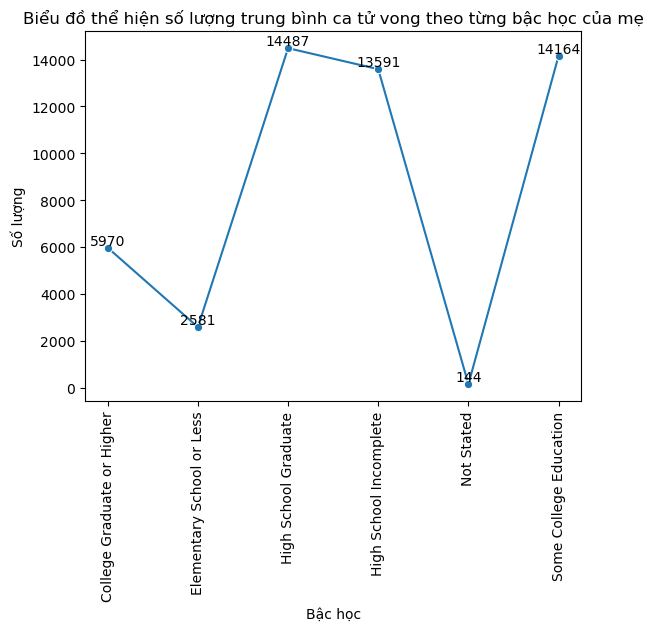

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Vẽ biểu đồ lineplot
sns.lineplot(
    x=groupby_data_birth["Mother's education"], 
    y=groupby_data_birth["Births"], 
    marker="o"  #  Thêm dấu marker trên đường
)

#Cài đặt tiêu đề và nhãn
plt.title("Biểu đồ thể hiện số lượng trung bình ca tử vong theo từng bậc học của mẹ")
plt.ylabel("Số lượng")
plt.xlabel("Bậc học")
plt.xticks(rotation=90)   # Xoay nhãn trên trục x

#Thêm giá trị lên từng điểm dữ liệu
for x, y in zip(groupby_data_birth["Mother's education"], groupby_data_birth["Births"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

#Hiển thị biểu đồ
plt.show()


 Bước 2 : Tổng số ca tử vọng  của từng bậc học

In [7]:
groupby_data_death = data.groupby('Mother\'s education')['Deaths'].mean().round(3)
#Chuyển kết quả thành DataFrame 
groupby_data_death = groupby_data_death.reset_index()
groupby_data_death

,Mother's education,Deaths
0,College Graduate or Higher,21.854
1,Elementary School or Less,13.261
2,High School Graduate,24.220
3,High School Incomplete,22.884
4,Not Stated,18.321
5,Some College Education,22.921


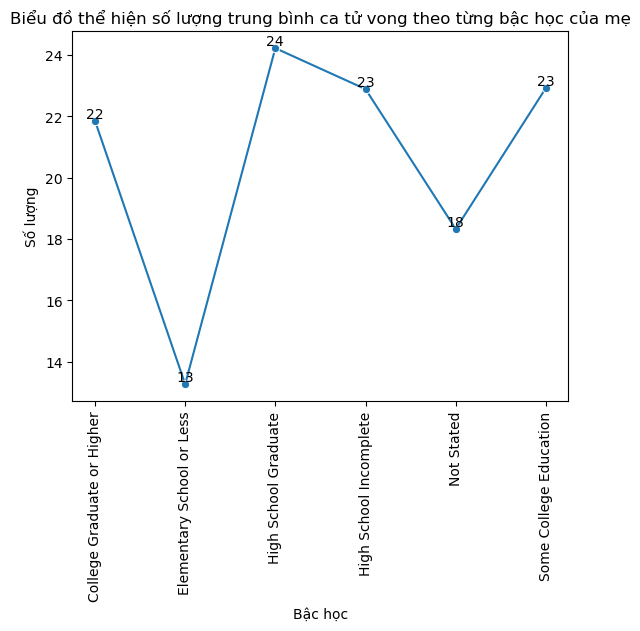

In [8]:
#Vẽ biểu đồ lineplot
sns.lineplot(
    x=groupby_data_death["Mother's education"], 
    y=groupby_data_death["Deaths"], 
    marker="o"   # Thêm dấu marker trên đường
)

# Cài đặt tiêu đề và nhãn
plt.title("Biểu đồ thể hiện số lượng trung bình ca tử vong theo từng bậc học của mẹ")
plt.ylabel("Số lượng")
plt.xlabel("Bậc học")
plt.xticks(rotation=90)   #  Xoay nhãn trên trục x

for x, y in zip(groupby_data_death["Mother's education"], groupby_data_death["Deaths"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')
    
# Hiển thị biểu đồ
plt.show()

In [9]:
data_death_rate = data.groupby("Mother's education")["Death rate per 1000"].mean()
data_death_rate = data_death_rate.reset_index()
data_death_rate

,Mother's education,Death rate per 1000
0,College Graduate or Higher,82.447847
1,Elementary School or Less,152.979770
2,High School Graduate,35.481176
3,High School Incomplete,53.220459
4,Not Stated,161.718805
5,Some College Education,60.118445


/tmp/ipykernel_17316/3811124440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data_death_rate["Mother's education"], rotation=90)


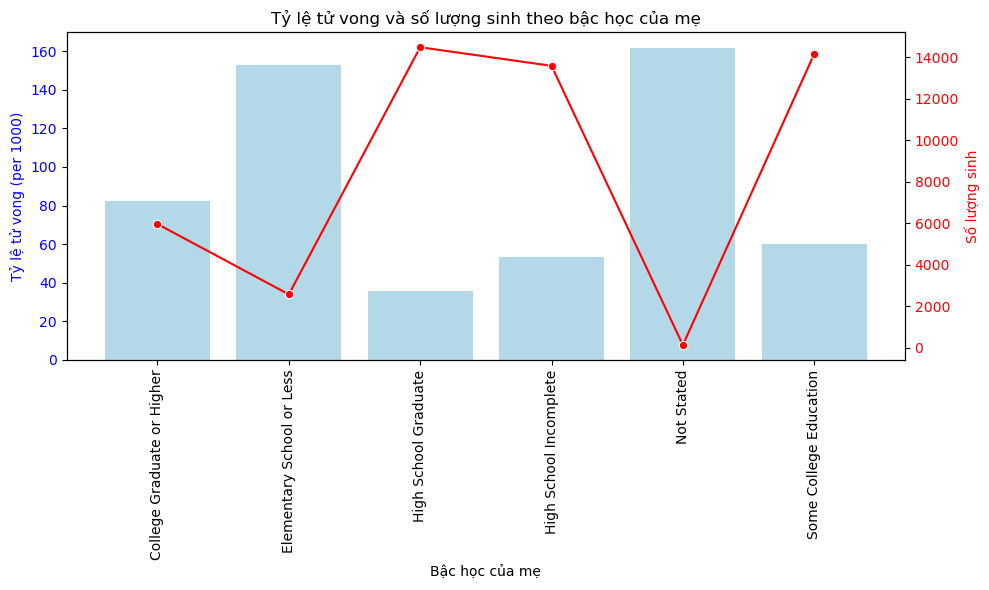

In [10]:
#  Tạo một figure và axis
fig, ax1 = plt.subplots(figsize=(10, 6))   # Kích thước của biểu đồ

# Trục y đầu tiên (cột: Death rate per 1000)
sns.barplot(
    x=data_death_rate["Mother's education"], 
    y=data_death_rate["Death rate per 1000"], 
    ax=ax1, 
    color='skyblue', 
    alpha=0.7
)
ax1.set_ylabel("Tỷ lệ tử vong (per 1000)", color='blue')
ax1.set_xlabel("Bậc học của mẹ")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(data_death_rate["Mother's education"], rotation=90)
ax1.set_title("Tỷ lệ tử vong và số lượng sinh theo bậc học của mẹ")

# Trục y thứ hai (đường: Births)
ax2 = ax1.twinx()   # Tạo trục y thứ hai chia sẻ trục x
sns.lineplot(
    x=groupby_data_birth["Mother's education"], 
    y=groupby_data_birth["Births"], 
    ax=ax2, 
    color='red', 
    marker='o'
)
ax2.set_ylabel("Số lượng sinh", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Phân tích mối quan hệ giữa học vấn của mẹ, số lượng sinh, và tỷ lệ tử vong của trẻ**

**1. Lý do chọn biểu đồ:**
- **Biểu đồ đường (Line chart):**  
  - Biểu diễn xu hướng và sự thay đổi số lượng sinh và tử vong qua từng bậc học.  
  - Phù hợp để nhận biết mức tăng giảm cụ thể và xu hướng tổng quát.  

- **Biểu đồ kết hợp (Dual-axis chart):**  
  - Kết hợp giữa số lượng sinh (biểu diễn bằng cột) và tỷ lệ tử vong (biểu diễn bằng đường) trên cùng một trục x.  
  - Hai trục y riêng biệt giúp dễ dàng so sánh và phân biệt hai chỉ số có đơn vị khác nhau.  
  - Hữu ích khi phân tích tương quan giữa hai yếu tố có liên quan mật thiết.  

---

**2. Phân tích chi tiết:**

**College Graduate or Higher (Tốt nghiệp đại học hoặc cao hơn):**
- **Số lượng sinh:**  
  - Trung bình, khoảng **4,481 trường hợp**.  
  - Nhóm này không có số lượng sinh cao nhất, cho thấy các yếu tố xã hội và kế hoạch hóa gia đình được thực hiện tốt.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **khoảng 100/1000 trẻ**.  
  - Trình độ học vấn cao giúp cải thiện điều kiện sống, tiếp cận dịch vụ y tế, và kiến thức chăm sóc trẻ.  

 **Elementary School or Less (Học tiểu học hoặc thấp hơn):**
- **Số lượng sinh:**  
  - Thấp nhất, khoảng **2,055 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Cao nhất, **200/1000 trẻ**.  
  - Sự thiếu hụt về kiến thức, điều kiện kinh tế, và khả năng tiếp cận dịch vụ y tế là nguyên nhân chính.  

 **High School Graduate (Tốt nghiệp trung học phổ thông):**
- **Số lượng sinh:**  
  - Cao nhất, khoảng **10,028 trường hợp**.  
  - Nhóm này chiếm tỷ trọng lớn trong dân số.  
- **Tỷ lệ tử vong:**  
  - Trung bình, khoảng **75-100/1000 trẻ**.  
  - Điều kiện sống và chăm sóc y tế ở mức trung bình.  

 **High School Incomplete (Chưa hoàn thành trung học phổ thông):**
- **Số lượng sinh:**  
  - Cao thứ hai, khoảng **9,787 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **dưới 50/1000 trẻ**.  
  - Nhóm này nhận được hỗ trợ y tế tốt hoặc giáo dục cơ bản về chăm sóc trẻ.  

 **Not Stated (Chưa bắt đầu hoặc không rõ):**
- **Số lượng sinh:**  
  - Cực thấp, chỉ **140 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Rất cao, thường thuộc nhóm cao nhất.  
  - Nhóm này có thể là tầng lớp yếu thế, gặp khó khăn trong tiếp cận dịch vụ y tế hoặc báo cáo thiếu chính xác.  

 **Some College Education (Có học đại học nhưng chưa tốt nghiệp):**
- **Số lượng sinh:**  
  - Cao thứ ba, khoảng **7,763 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **dưới 50/1000 trẻ**.  
  - Nhóm này đủ kiến thức và điều kiện để chăm sóc trẻ tốt hơn.

---

 **Kết luận:**
- **Tương quan mạnh mẽ giữa học vấn của mẹ và tỷ lệ tử vong của trẻ:**  
  - **Học vấn càng cao, tỷ lệ tử vong càng thấp.**  
- **Nhóm có học vấn thấp (Elementary School or Less):**  
  - Có tỷ lệ tử vong cao nhất.  
- **Nhóm không rõ thông tin (Not Stated):**  
  - Tỷ lệ tử vong cao, có thể do thiếu khả năng tiếp cận dịch vụ y tế hoặc báo cáo thiếu chính xác.  

---

 **Đề xuất:**
- **Hỗ trợ nhóm có học vấn thấp:**  
  - Cung cấp các chương trình giáo dục miễn phí về sức khỏe sinh sản và chăm sóc trẻ em.  
  - Đưa ra chính sách khuyến khích giáo dục bậc cao hơn cho phụ nữ.  

- **Cải thiện tiếp cận dịch vụ y tế:**  
  - Mở rộng các dịch vụ y tế công cộng, đặc biệt ở vùng sâu vùng xa.  
  - Triển khai các chương trình tiêm chủng và kiểm tra sức khỏe cho mẹ và trẻ.  

- **Nâng cao nhận thức về tầm quan trọng của dữ liệu:**  
  - Nhóm "Not Stated" cho thấy tầm quan trọng của việc cải thiện hệ thống báo cáo dữ liệu.  

---

 **5. Nhận định chung:**
Phân tích cho thấy học vấn của mẹ là một trong những yếu tố quan trọng nhất ảnh hưởng đến tỷ lệ tử vong và số lượng sinh của trẻ. Cần có các biện pháp giáo dục và chính sách y tế hiệu quả để cải thiện tình trạng này, đặc biệt ở nhóm dễ bị tổn thương.


### **Câu hỏi 2: Độ tuổi của mẹ có mối quan hệ như nào trong việc sinh và tử vong của trẻ và kết hợp với [câu hỏi 1](#câu-hỏi-1-trình-độ-học-vấn-của-mẹ-có-mối-quan-hệ-như-nào-trong-việc-sinh-và-tử-vong-của-trẻ) để rút ra độ tuổi, bậc học nào có tỉ lệ tử vong cao ?**

- Lợi ích: 
    + Xác định nhóm tuổi nguy cơ:
        + Tìm hiểu nhóm tuổi mẹ có tỷ lệ sinh và tử vong trẻ em cao nhất hoặc thấp nhất.
        + Đưa ra khuyến nghị về thời điểm phù hợp để mang thai nhằm giảm rủi ro.
- Cách trả lời câu hỏi này:
    + Vẽ biểu đồ dual axis chart cho số lượng sinh và tỉ lệ tử vong

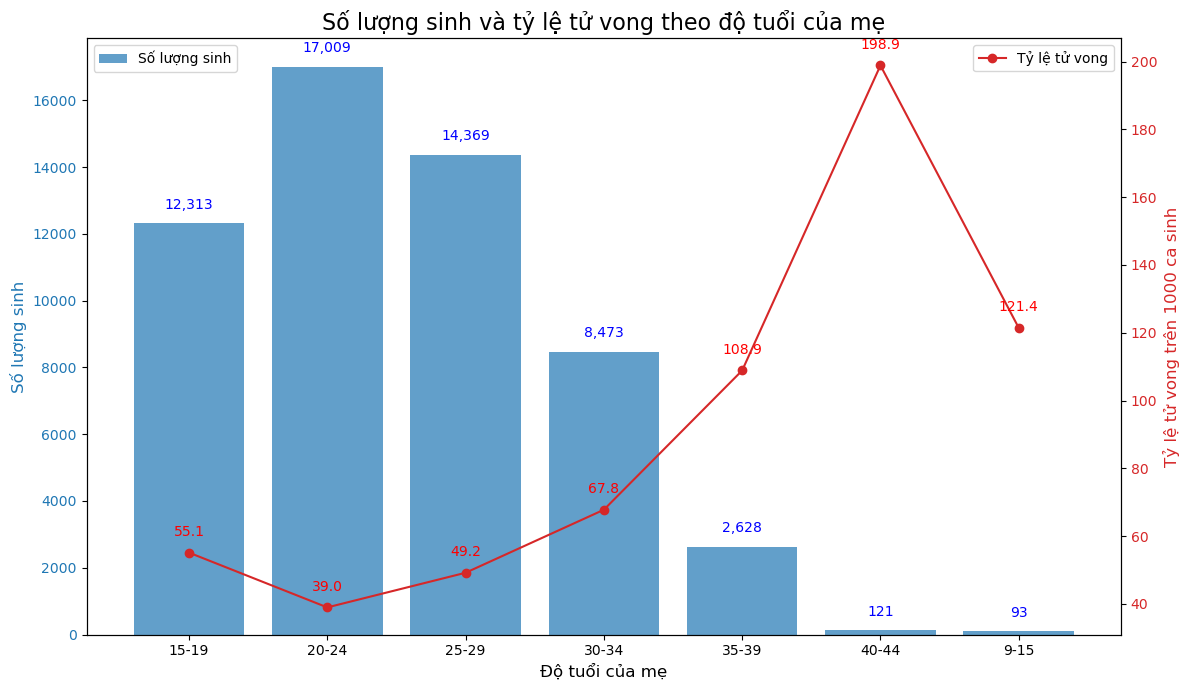

In [21]:
# Tổng hợp dữ liệu: Số lượng sinh và tỷ lệ tử vong theo độ tuổi của mẹ
dual_axis_data = data.groupby('Age of mother').agg({'Births': 'mean', 'Death rate per 1000': 'mean'}).sort_index()

# Tạo biểu đồ Dual Axis Chart
fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho số lượng sinh
color = 'tab:blue'
ax1.set_xlabel('Độ tuổi của mẹ', fontsize=12)
ax1.set_ylabel('Số ca sinh', color=color, fontsize=12)
bars = ax1.bar(dual_axis_data.index, dual_axis_data['Births'], color=color, alpha=0.7, label='Số lượng sinh')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Hiển thị giá trị trên các cột
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * max(dual_axis_data['Births']),  # Vị trí trên cột
             f'{int(height):,}', ha='center', va='bottom', fontsize=10, color='blue')

# Vẽ đường tỷ lệ tử vong trên trục Y thứ hai
ax2 = ax1.twinx()  # Trục Y thứ hai
color = 'tab:red'
ax2.set_ylabel('Tỷ lệ tử vong trên 1000 ca sinh', color=color, fontsize=12)
line = ax2.plot(dual_axis_data.index, dual_axis_data['Death rate per 1000'], color=color, marker='o', label='Tỷ lệ tử vong')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Hiển thị giá trị trên đường
for i, value in enumerate(dual_axis_data['Death rate per 1000']):
    ax2.text(i, value + 0.02 * max(dual_axis_data['Death rate per 1000']),  # Vị trí trên điểm
             f'{value:.1f}', ha='center', va='bottom', fontsize=10, color='red')

# Thêm tiêu đề và căn chỉnh biểu đồ
plt.title('Số lượng sinh và tỷ lệ tử vong theo độ tuổi của mẹ', fontsize=16)
plt.tight_layout()
plt.show()

#### **Độ tuổi của mẹ có mối quan hệ như nào trong việc sinh và tử vong của trẻ**
**Lý do chọn biểu đồ kết hợp (Dual Axis Chart):** biểu đồ kết hợp (dual axis chart) được chọn để phân tích mối quan hệ giữa **số lượng sinh** và **tỷ lệ tử vong** theo độ tuổi của mẹ vì những lý do sau:
1. **So sánh trực quan**: Biểu đồ kết hợp giúp dễ dàng so sánh hai biến có đơn vị và phạm vi khác nhau, cụ thể là:
   - **Số lượng sinh** có đơn vị là số trẻ, và giá trị của nó có thể rất lớn.
   - **Tỷ lệ tử vong** có đơn vị là tỷ lệ tử vong trên 1000 ca sinh, và giá trị của nó có thể thấp hơn nhiều.
   
   Việc sử dụng hai trục y giúp dễ dàng nhận diện sự khác biệt giữa hai thông số này và hiểu được mối quan hệ giữa chúng.

2. **Mối quan hệ rõ ràng giữa hai yếu tố**: Số lượng sinh và tỷ lệ tử vong có thể có sự tương quan, ví dụ, khi số lượng sinh cao, tỷ lệ tử vong có thể cũng tăng (đặc biệt ở nhóm tuổi cao hoặc rất thấp). Biểu đồ kết hợp giúp làm nổi bật sự thay đổi của cả hai yếu tố cùng lúc mà không bị nhầm lẫn vì chúng có đơn vị khác nhau.

3. **Dễ dàng theo dõi xu hướng**: Biểu đồ cột cho số lượng sinh giúp trực quan hóa số lượng trẻ sinh ra theo từng nhóm tuổi, trong khi biểu đồ đường cho tỷ lệ tử vong giúp theo dõi sự biến động của tỷ lệ tử vong qua các nhóm tuổi của mẹ. Điều này giúp người dùng nhận ra các xu hướng trong dữ liệu, chẳng hạn như tỷ lệ tử vong cao ở các nhóm tuổi quá sớm (9-15) và quá muộn (40-44).

4. **Tính linh hoạt và đơn giản**: Việc sử dụng một biểu đồ duy nhất giúp tiết kiệm không gian và làm cho việc trình bày trở nên mạch lạc và dễ hiểu hơn, thay vì phải sử dụng nhiều biểu đồ khác nhau.

Vì những lý do trên, biểu đồ kết hợp là lựa chọn thích hợp để phân tích và so sánh số lượng sinh và tỷ lệ tử vong trong các nhóm độ tuổi khác nhau của mẹ.


**Phân tích**
1. **Trung bình số ca sinh**:
   - **Nhóm tuổi 20-24** vẫn có số lượng sinh cao nhất với 17,009 trẻ, tiếp theo là nhóm 25-29 với 14,369 trẻ.
   - Nhóm 15-19 tuổi có số lượng sinh khá thấp (12,313), nhưng vẫn cao hơn nhóm 30-34 và 35-39.
   - Số lượng sinh giảm mạnh khi tuổi mẹ từ 30-34 trở lên.
   - Nhóm 9-15 tuổi  có giá trị cực kì nhỏ (93)

2. **Tỷ lệ tử vong**:
   - Nhóm 40-44 tuổi với 198.9 là tỉ lệ tử vong cao nhất. Điều này có thể giải thích bởi các nguy cơ sinh sản lớn ở những độ tuổi quá sớm và quá muộn.
   - Nhóm 30-34 tuổi có tỷ lệ tử vong là 67.8, và tỷ lệ này tăng dần khi tuổi mẹ cao lên.
   - Nhóm tuổi 9-15 có tỷ lệ tử vong thấp thứ 2 (121.4) mặc dù số lượng sinh thấp rất xa với các lứa tuổi khác.

**Kết luận:**

1. **Số lượng sinh**:
   - Nhóm tuổi **20-24** có số lượng sinh cao nhất (17,009 trẻ), tiếp theo là nhóm **25-29** (14,369 trẻ). Điều này cho thấy nhóm tuổi này có mức độ sinh nở cao và ổn định.
   - Nhóm **15-19** có số lượng sinh thấp (12,313), nhưng vẫn cao hơn nhóm **30-34** và **35-39**, cho thấy mặc dù sinh con ở độ tuổi quá sớm có thể có một số rủi ro, nhưng vẫn có xu hướng sinh con cao hơn so với nhóm tuổi lớn.
   - **Số lượng sinh giảm mạnh** khi tuổi mẹ tăng lên, đặc biệt là ở các nhóm tuổi từ **30-34** trở lên. Điều này phản ánh xu hướng giảm khả năng sinh con ở phụ nữ lớn tuổi.
   - **Nhóm tuổi 9-15** có số lượng sinh rất thấp (93), cho thấy độ tuổi quá nhỏ để sinh con có rất ít trường hợp.

2. **Tỷ lệ tử vong**:
   - Nhóm **40-44 tuổi** có tỷ lệ tử vong cao nhất (198.9), điều này có thể được giải thích bởi các nguy cơ thai kỳ và sinh sản cao ở phụ nữ lớn tuổi. Phụ nữ trong nhóm tuổi này có nguy cơ cao gặp phải các biến chứng trong khi mang thai và sinh con.
   - Nhóm **30-34 tuổi** có tỷ lệ tử vong 67.8, tỷ lệ này **tăng dần** khi tuổi mẹ lớn lên. Điều này cho thấy rằng khi tuổi mẹ càng cao, nguy cơ tử vong và các biến chứng trong quá trình sinh nở cũng tăng theo.
   - **Nhóm tuổi 9-15 tuổi** có tỷ lệ tử vong khá cao (121.4) mặc dù số lượng sinh thấp. Điều này cho thấy những nguy cơ sinh sản rất lớn ở độ tuổi quá sớm, khi cơ thể của mẹ chưa sẵn sàng cho việc mang thai và sinh con, dẫn đến nguy cơ tử vong cao.

**Đề xuất**:
1. **Giáo dục giới tính cho trẻ từ 9-19 tuổi:**
   - Các trường, xã và địa phương tích cực việc ***giáo dục giới tính*** cho trẻ để tránh việc:
      - **Giảm thiểu tình trạng mang thai ngoài ý muốn**: Việc giáo dục về các biện pháp tránh thai, sức khỏe sinh sản và nhận thức về trách nhiệm trong quan hệ tình dục sẽ giúp các em hiểu và phòng tránh những hậu quả không mong muốn.
  
      - **Bảo vệ trẻ khỏi lạm dụng tình dục**: Giới thiệu các khái niệm về sự đồng thuận, quyền kiểm soát cơ thể và nhận thức về lạm dụng tình dục giúp trẻ nhận diện các tình huống nguy hiểm và bảo vệ mình.
  
      - **Khuyến khích hành vi lành mạnh**: Giáo dục giới tính đúng đắn giúp trẻ xây dựng mối quan hệ lành mạnh và phát triển kỹ năng sống cần thiết để đối phó với các thách thức trong xã hội.
  
      - **Giảm thiểu tỷ lệ tử vong và sinh sản không an toàn**: Việc cung cấp kiến thức cho trẻ giúp giảm nguy cơ các vấn đề về sức khỏe liên quan đến sinh sản và tử vong ở lứa tuổi vị thành niên, đặc biệt là ở các nhóm tuổi từ 9-19, nơi có sự thay đổi về thể chất và tâm lý mạnh mẽ.

2. **Chính sách hỗ trợ sức khỏe sinh sản**:
   - Cung cấp các chương trình giáo dục sức khỏe sinh sản cho phụ nữ trẻ (đặc biệt là từ 15-19 tuổi) để giảm thiểu mang thai sớm.
   - Cung cấp chăm sóc thai kỳ chuyên sâu cho phụ nữ trên 35 tuổi, với các xét nghiệm và kiểm tra sức khỏe thường xuyên.

3. **Khuyến khích sinh con trong độ tuổi an toàn**:
   - Chính phủ và các tổ chức xã hội có thể đưa ra các chiến lược tuyên truyền về lợi ích của việc sinh con trong độ tuổi từ 20-29 và các biện pháp phòng ngừa các rủi ro khi sinh con sớm hoặc muộn.

4. **Đề xuất các nghiên cứu bổ sung**:
   - Tiến hành các nghiên cứu thêm về tình trạng dinh dưỡng, sức khỏe và các yếu tố xã hội, kinh tế ảnh hưởng đến tỷ lệ sinh và tử vong, để đưa ra các biện pháp can thiệp chính xác hơn.


**Phân tích độ tuổi, bậc học nào có tỉ lệ tử vong cao** 

In [33]:
# Nhóm theo 'Trình độ học vấn' và 'Bậc tuổi' và tính trung bình tỷ lệ tử vong
df_avg_mortality = data.groupby(["Mother's education", "Age of mother"])['Death rate per 1000'].mean().reset_index()

In [39]:
# Pivot DataFrame để tạo ma trận cho heatmap
heatmap_data = df_avg_mortality.pivot(index="Age of mother", columns="Mother's education", values="Death rate per 1000")
heatmap_data.to_csv("test01.csv")

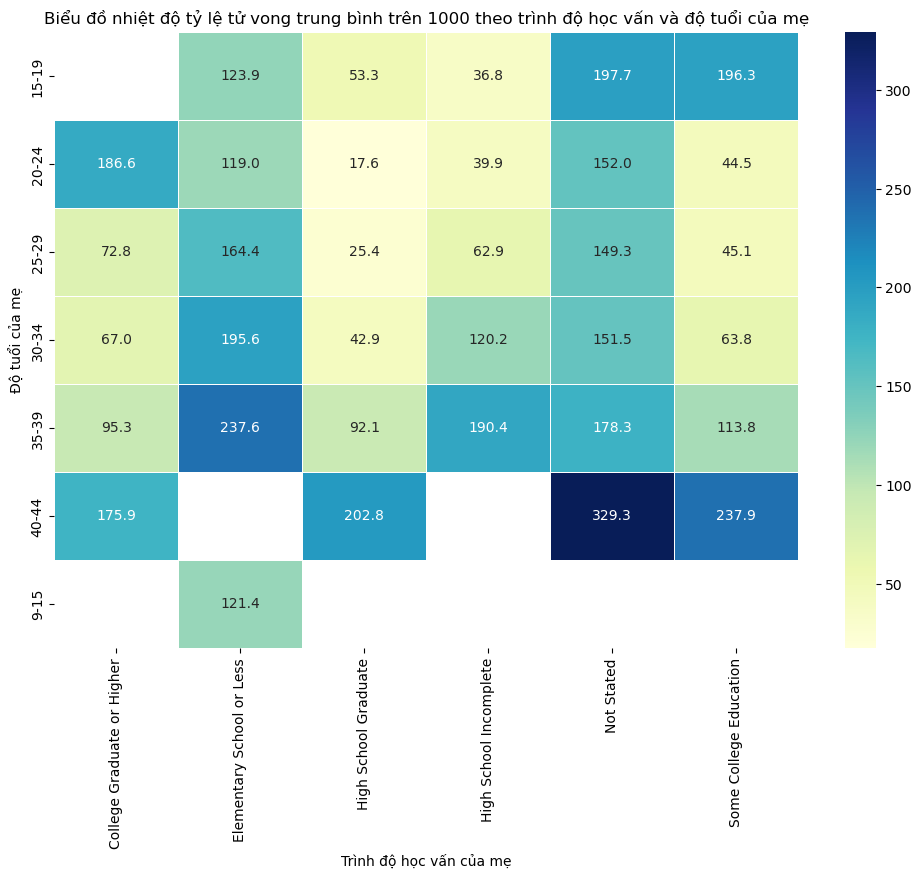

In [37]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)

# Thêm tiêu đề và nhãn cho trục
plt.title("Biểu đồ nhiệt độ tỷ lệ tử vong trung bình trên 1000 theo trình độ học vấn và độ tuổi của mẹ")
plt.xlabel("Trình độ học vấn của mẹ")
plt.ylabel("Độ tuổi của mẹ")

# Hiển thị biểu đồ
plt.show()


**Phân tích chi tiết từng nhóm:**
- Mẹ tuổi 15-19: Nhóm này có tỷ lệ tử vong cao, đặc biệt là ở nhóm mẹ có trình độ học vấn thấp.

- Mẹ tuổi 20-24: Tỷ lệ tử vong giảm so với nhóm 15-19, nhưng vẫn cao ở nhóm mẹ có trình độ tiểu học hoặc ít hơn.

- Mẹ tuổi 25-29 và 30-34:: Tỷ lệ tử vong tiếp tục giảm, sự khác biệt giữa các nhóm trình độ học vấn ít rõ rệt hơn.

- Mẹ tuổi 35-39: Tỷ lệ tử vong bắt đầu tăng nhẹ, nhưng vẫn thấp hơn các nhóm tuổi trẻ hơn, sự khác biệt giữa các nhóm trình độ học vấn vẫn được duy trì.
- Mẹ tuổi 40-44: Tỷ lệ tử vong tăng đáng kể, đặc biệt là nhóm "Not Stated" (không rõ trình độ học vấn). Nhóm mẹ có trình độ học vấn cao có tỷ lệ tử vong thấp hơn so với các nhóm trình độ học vấn thấp hơn.
- Mẹ tuổi 9-15: Số liệu hạn chế, chỉ có thông tin về nhóm mẹ có trình độ tiểu học hoặc ít hơn.

**Kết luận:**
- Dữ liệu cho thấy mối quan hệ mạnh mẽ giữa trình độ học vấn của mẹ và tỷ lệ tử vong ở trẻ sơ sinh. Mẹ có trình độ học vấn cao hơn có xu hướng có tỷ lệ tử vong ở trẻ sơ sinh thấp hơn. Độ tuổi của mẹ cũng đóng vai trò quan trọng, với tỷ lệ tử vong cao hơn ở nhóm tuổi trẻ (dưới 20) và cao tuổi (trên 40).